Device set to use mps:0


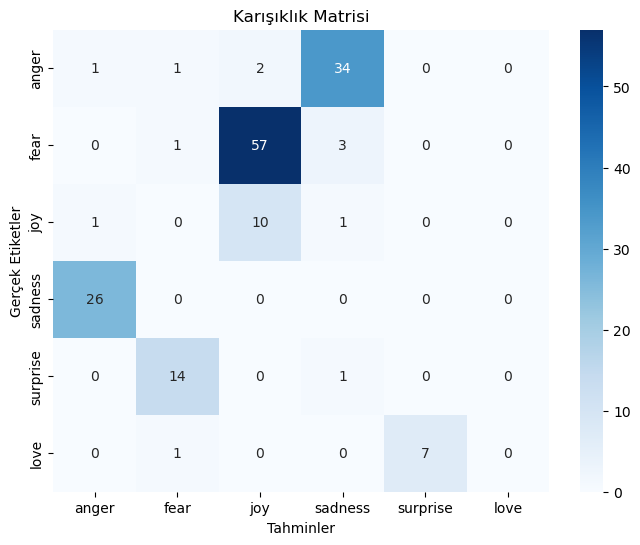

              precision    recall  f1-score   support

           0       0.04      0.03      0.03        38
           1       0.06      0.02      0.03        61
           2       0.14      0.83      0.25        12
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         8

    accuracy                           0.07       160
   macro avg       0.04      0.15      0.05       160
weighted avg       0.04      0.07      0.04       160



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
from transformers import pipeline
from datasets import load_dataset
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 'emotion' veri setini yükleyelim
ds = load_dataset("emotion", split="train[:1%]")  # Veri setinden küçük bir örnek alalım

# Duygu sınıflandırması için bir pipeline oluşturuyoruz
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Gerçek etiketler (veri setinden alınacak)
true_labels = ds['label']  # 'label' sütununda duygu etiketleri yer alıyor

# Model ile tahmin yapalım
predictions = [classifier(text['text'])[0]['label'] for text in ds]

# Duygu etiketlerini sayısal hale getirelim
emotion_map = {
    "anger": 0,
    "fear": 1,
    "joy": 2,
    "sadness": 3,
    "surprise": 4,
    "love": 5
}

# Tahminleri sayısal hale dönüştür
numeric_predictions = [emotion_map[pred] for pred in predictions]

emotion_labels = list(emotion_map.keys())  # Dict keys'i listeye çeviriyoruz
numeric_true_labels = [emotion_map[emotion_labels[label]] for label in true_labels]

# Karışıklık Matrisi
cm = confusion_matrix(numeric_true_labels, numeric_predictions)

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["anger", "fear", "joy", "sadness", "surprise", "love"], yticklabels=["anger", "fear", "joy", "sadness", "surprise", "love"])
plt.xlabel('Tahminler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()

# Performans raporu (precision, recall, f1-score)
print(classification_report(numeric_true_labels, numeric_predictions))
